# FT -> IFT 한 결과 (잘 나오네)

In [ ]:
file_path = '/SSD3_8TB/Daniel/dataset/IXI/IXI-T1/IXI002-Guys-0828-T1.nii.gz'

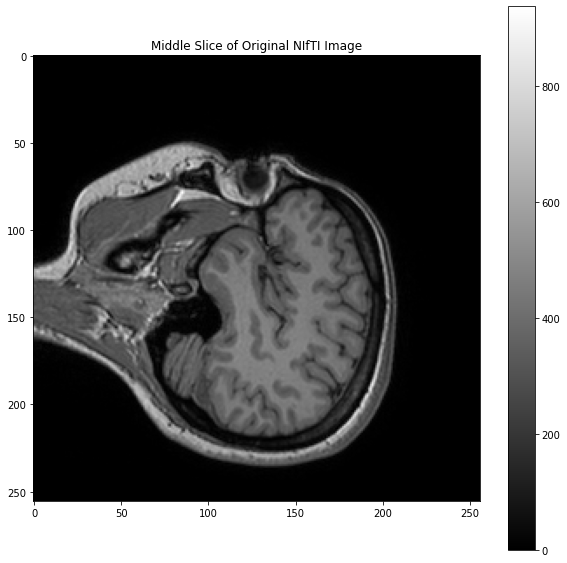

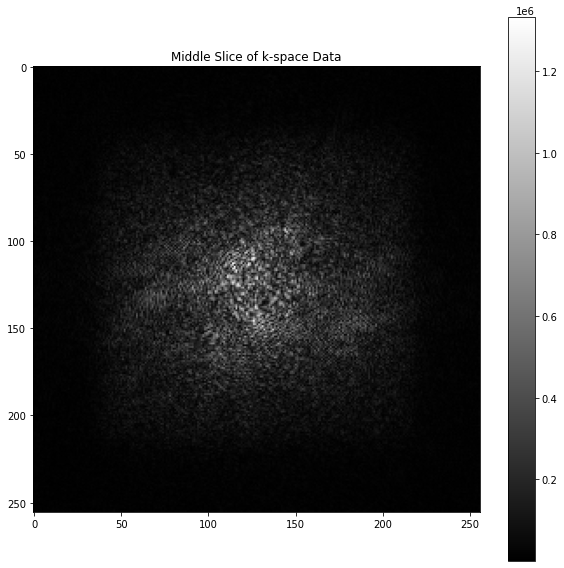

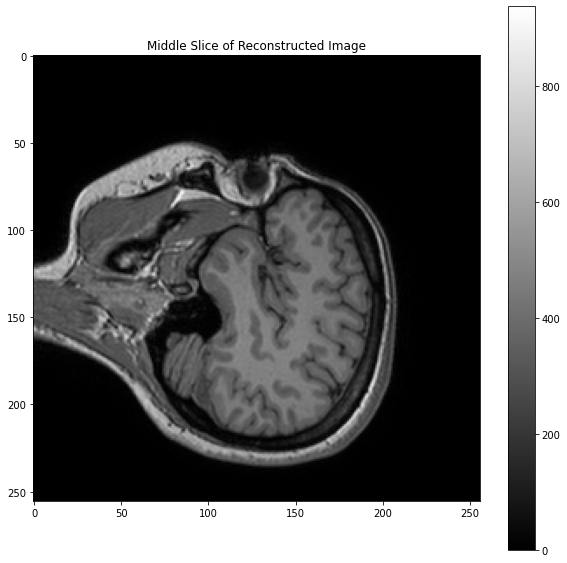

In [20]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Load the nii.gz file
file_path = '/SSD3_8TB/Daniel/dataset/IXI/IXI-T1/IXI002-Guys-0828-T1.nii.gz'
nii_image = nib.load(file_path)
image_data = nii_image.get_fdata()

# Find the middle slice index
# middle_slice_index = image_data.shape[2] // 2
middle_slice_index = 110

# Plot the middle slice of the original NIfTI image
plt.figure(figsize=(10, 10))
plt.imshow(image_data[:, :, middle_slice_index], cmap='gray')
plt.title('Middle Slice of Original NIfTI Image')
plt.colorbar()
plt.show()

# Apply the Fourier Transform to get k-space data
kspace_data = np.fft.fftshift(np.fft.fftn(np.fft.ifftshift(image_data)))

# Plot the middle slice of k-space data in 2D
plt.figure(figsize=(10, 10))
plt.imshow(np.abs(kspace_data[:, :, middle_slice_index]), cmap='gray')
plt.title('Middle Slice of k-space Data')
plt.colorbar()
plt.show()

# Apply the inverse Fourier Transform to get back the image data
reconstructed_image_data = np.fft.fftshift(np.fft.ifftn(np.fft.ifftshift(kspace_data)))

# Plot the middle slice of the reconstructed image
plt.figure(figsize=(10, 10))
plt.imshow(np.abs(reconstructed_image_data[:, :, middle_slice_index]), cmap='gray')
plt.title('Middle Slice of Reconstructed Image')
plt.colorbar()
plt.show()

In [21]:
kspace_data

array([[[-1.23370000e+04+7.06305036e-12j,
         -5.16849426e+03+8.86885677e+03j,
          1.39504435e+03+5.79132162e+03j, ...,
         -5.13946967e+03+1.12118811e+03j,
          1.39504435e+03-5.79132162e+03j,
         -5.16849426e+03-8.86885677e+03j],
        [-7.62442005e+03+2.16583542e+03j,
          2.47883500e+03-3.69146652e+03j,
          6.56356733e+03-5.22808809e+03j, ...,
          1.64779177e+03-6.24563049e+03j,
         -4.21553658e+03-7.20038280e+03j,
         -5.19815515e+03-3.50013715e+02j],
        [ 2.57153558e+03-2.76047546e+03j,
          4.54914957e+02-5.35676749e+03j,
         -7.15123648e+02-3.53138152e+03j, ...,
          9.27160496e+02-1.47763672e+04j,
         -7.27505216e+03-5.34033340e+03j,
         -1.38776323e+03+5.59528384e+03j],
        ...,
        [ 1.46283888e+04+4.56396808e+03j,
          1.80672027e+04+9.04951786e+02j,
          5.75989732e+02+1.49990278e+03j, ...,
          5.53374515e+02+2.68860784e+03j,
         -5.26778912e+03+2.17520593e+03j

# Motion 넣어봤는데 좀 이상하게 된다

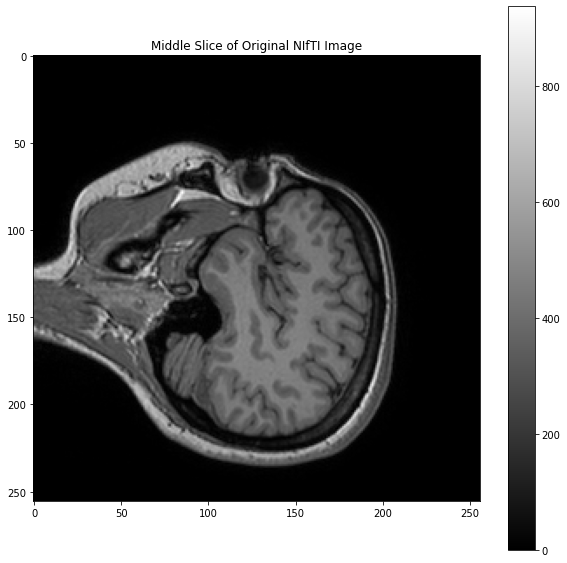

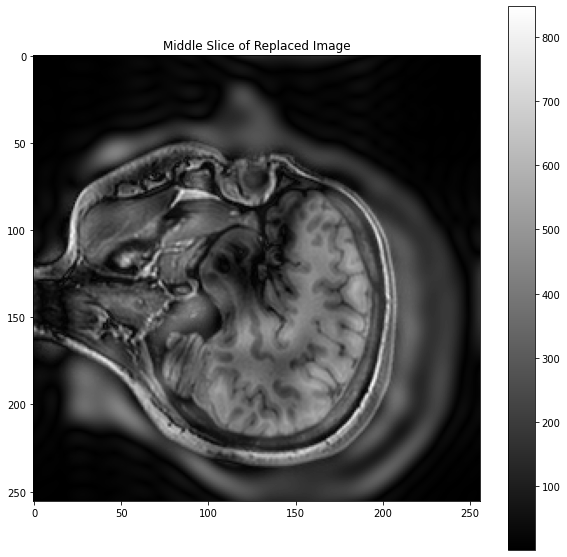

In [26]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage

# Load the nii.gz file
file_path = '/SSD3_8TB/Daniel/dataset/IXI/IXI-T1/IXI002-Guys-0828-T1.nii.gz'
nii_image = nib.load(file_path)
image_data = nii_image.get_fdata()

# Find the middle slice index
middle_slice_index = 110

# Plot the middle slice of the original NIfTI image
plt.figure(figsize=(10, 10))
plt.imshow(image_data[:, :, middle_slice_index], cmap='gray')
plt.title('Middle Slice of Original NIfTI Image')
plt.colorbar()
plt.show()

# Apply the Fourier Transform to get k-space data
kspace_data = np.fft.fftshift(np.fft.fftn(np.fft.ifftshift(image_data)))

# Translate the original image
translation = (10, 20, 30)
translated_image_data = ndimage.shift(image_data, translation)

# Apply the Fourier Transform to get k-space data for the translated image
translated_kspace_data = np.fft.fftshift(np.fft.fftn(np.fft.ifftshift(translated_image_data)))

# Replace 10% of low-frequency components of k-space data with translated k-space data
fraction = 0.1
center = [int(dim // 2) for dim in kspace_data.shape]
size = [int(dim * fraction) for dim in kspace_data.shape]
replaced_kspace_data = kspace_data.copy()
replaced_kspace_data[center[0]-size[0]//2:center[0]+size[0]//2, center[1]-size[1]//2:center[1]+size[1]//2, center[2]-size[2]//2:center[2]+size[2]//2] = \
    translated_kspace_data[center[0]-size[0]//2:center[0]+size[0]//2, center[1]-size[1]//2:center[1]+size[1]//2, center[2]-size[2]//2:center[2]+size[2]//2]

# Apply the inverse Fourier Transform to get back the image data with replaced low-frequency components
replaced_image_data = np.fft.fftshift(np.fft.ifftn(np.fft.ifftshift(replaced_kspace_data)))

# Plot the middle slice of the replaced image
plt.figure(figsize=(10, 10))
plt.imshow(np.abs(replaced_image_data[:, :, middle_slice_index]), cmap='gray')
plt.title('Middle Slice of Replaced Image')
plt.colorbar()
plt.show()